**Objective**: perform a explanatory data analysis.

**Table of content:**
1. Quick overview  
2. Analysis by patient 
3. Distribution of the time before the next readmission
4. Distribution of other columns
5. Correlation

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

import os
path_dir = os.path.dirname(os.getcwd())

import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

pio.renderers.default = "svg"

In [2]:
df = pd.read_csv(os.path.join(path_dir, "outputs", "data", "hdhi_clean.csv"))

/var/folders/x1/5lcr60ps53nfbsvw0s9dt0640000gn/T/ipykernel_17581/3539641945.py:1: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



# 1. Quick overview

In [3]:
df.head()

,sno,mrd,doa,dod,age,gender,rural,duration_of_stay,duration_of_intensive_unit_stay,smoking,...,time_before_readm,nb_next_readm_days,censored,first_visit,nb_visits,duration_of_stay_lag1,duration_of_intensive_unit_stay_lag1,cardiogenic_shock_lag1,cad_lag1,time_before_readm_lag1
0,6500,1006,2018-02-09,2018-02-09,80,M,0,58,58,0,...,415.0,NaN,True,1,0,0.0,0.0,0.0,0.0,0.0
1,9467,101169,2018-07-09,2018-07-09,64,F,0,10,2,0,...,265.0,NaN,True,1,0,0.0,0.0,0.0,0.0,0.0
2,6657,101189,2018-02-15,2018-02-15,70,M,0,1,0,0,...,409.0,NaN,True,1,0,0.0,0.0,0.0,0.0,0.0
3,1823,101322,2017-07-07,2017-07-07,74,F,0,2,1,0,...,162.0,162.0,False,1,0,0.0,0.0,0.0,0.0,0.0
4,5195,101322,2017-12-16,2017-12-16,74,F,0,2,1,0,...,22.0,22.0,False,0,1,2.0,1.0,0.0,1.0,162.0


In [4]:
df.shape

(14390, 69)

In [5]:
df['censored'].mean()

0.8507991660875608

In [6]:
df[df['age_mor'].isna()].shape[0]/df.shape[0]

0.9960389159138291

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sno,14390.0,7678.019180,4554.966666,1.0,3683.25,7624.5,11607.75,15756.0
age,14390.0,61.399236,13.433759,4.0,54.00,62.0,70.00,110.0
rural,14390.0,0.235163,0.424116,0.0,0.00,0.0,0.00,1.0
duration_of_stay,14390.0,6.373454,5.020377,1.0,3.00,5.0,8.00,98.0
duration_of_intensive_unit_stay,14390.0,3.805837,4.013438,0.0,1.00,3.0,5.00,58.0
...,...,...,...,...,...,...,...,...
duration_of_stay_lag1,14390.0,1.117165,3.438755,0.0,0.00,0.0,0.00,98.0
duration_of_intensive_unit_stay_lag1,14390.0,0.648853,2.289716,0.0,0.00,0.0,0.00,39.0
cardiogenic_shock_lag1,14390.0,0.005768,0.075730,0.0,0.00,0.0,0.00,1.0
cad_lag1,14390.0,0.104587,0.306031,0.0,0.00,0.0,0.00,1.0


# 2. Analysis by patient

In [8]:
# number of unique patients

df.mrd.nunique()

12243

13 % of patients came more than once.


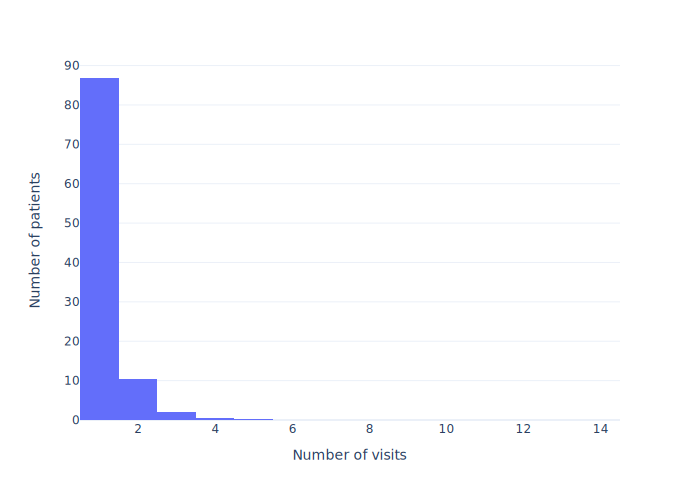

In [9]:
# distribution of the number of visits by patients

tmp = df.groupby(['mrd'], as_index=False).agg({'sno':'count'})
print('{} % of patients came more than once.'.format(round(tmp[tmp.sno>1].shape[0]/tmp.shape[0]*100)))

fig = px.histogram(tmp, x='sno',histnorm = "percent")
fig.update_xaxes(title="Number of visits")
fig.update_yaxes(title="Number of patients")

# 3. Distribution of the time before the next readmission

count    2147.000000
mean      131.262226
std       136.949657
min         1.000000
25%        27.000000
50%        81.000000
75%       195.000000
max       705.000000
Name: time_before_readm, dtype: float64

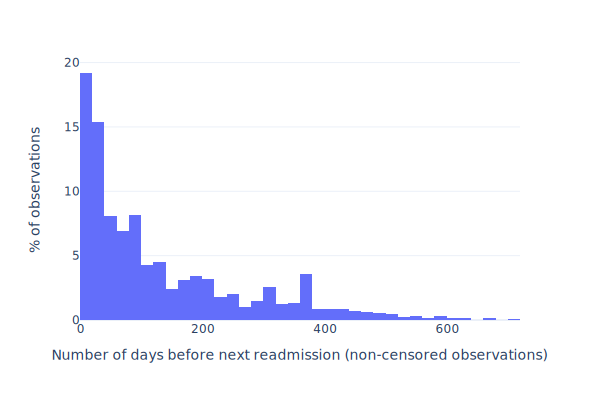

In [10]:
# number of days before next readmission for non-censored observations

display(df[df.censored == False].time_before_readm.describe())

fig = px.histogram(
    df[df.censored == False], x='time_before_readm', histnorm = "percent", 
    width = 600, height = 400)

fig.update_yaxes(title="% of observations")
fig.update_xaxes(title="Number of days before next readmission (non-censored observations)")

count    14390.000000
mean       311.988256
std        218.076504
min          0.000000
25%        108.000000
50%        292.000000
75%        497.000000
max        729.000000
Name: time_before_readm, dtype: float64

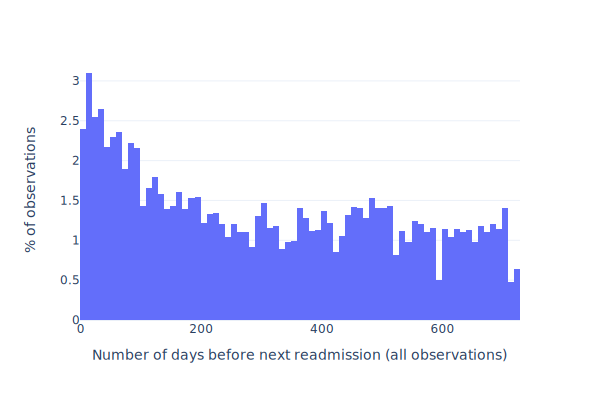

In [11]:
# number of days before next readmission for all observations

display(df.time_before_readm.describe())

fig = px.histogram(
    df, x='time_before_readm', histnorm = "percent", 
    width = 600, height = 400)

fig.update_yaxes(title="% of observations")
fig.update_xaxes(title="Number of days before next readmission (all observations)")

# 4. Distribution of other columns

In [12]:
cols = [c for c in df.columns if 'lag' not in c and 'date' not in c]
cols = list(set(cols) - set(['sno', 'nb_next_readm', 'age_mor', 'default_nb_next_readm_days', 'nb_next_readm_days']))

Column type_adm=E
0.0% missing values


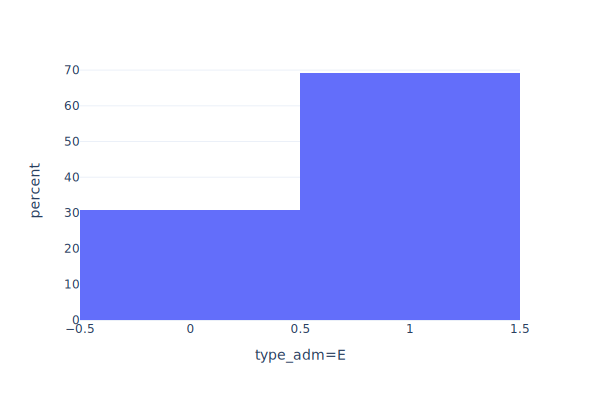

Column duration_of_stay
0.0% missing values


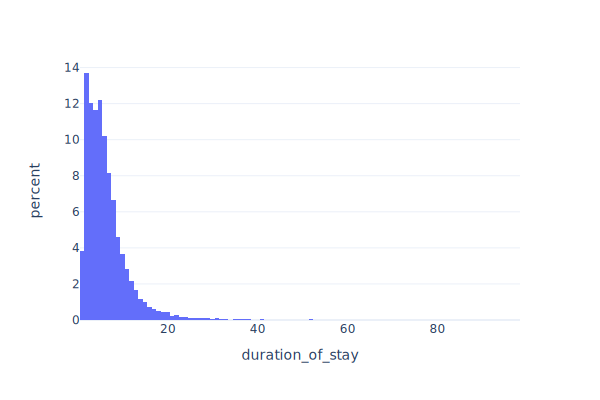

Column infective_endocarditis
0.0% missing values


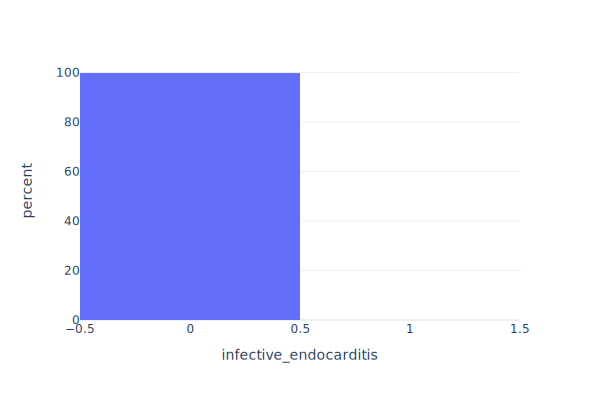

Column doa
0.0% missing values


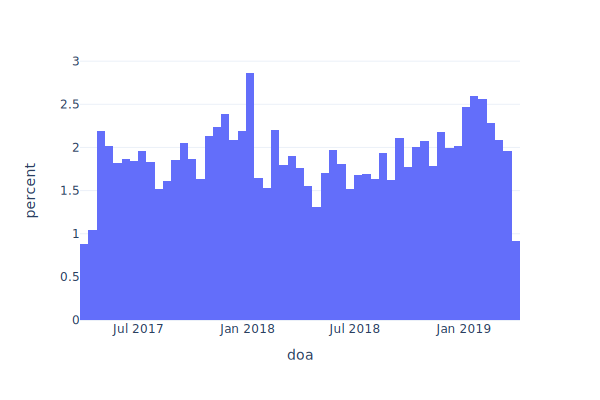

Column orthostatic
0.0% missing values


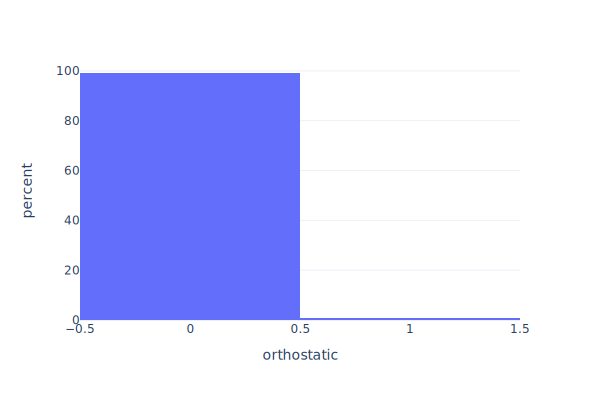

Column shock
0.0% missing values


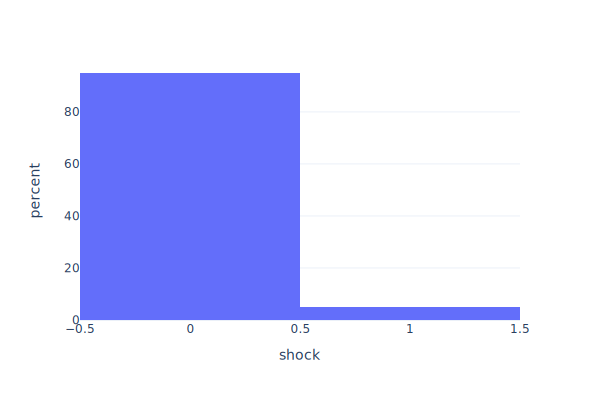

Column dm
0.0% missing values


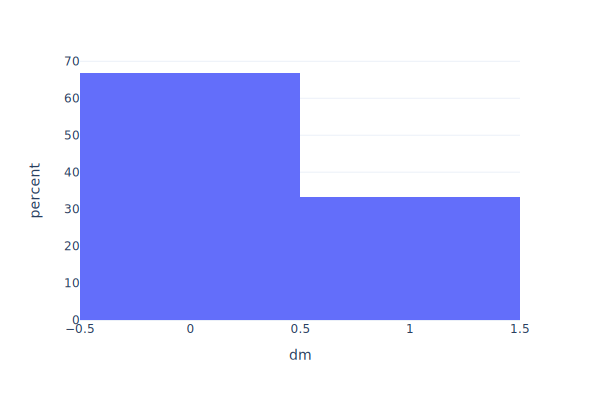

Column ckd
0.0% missing values


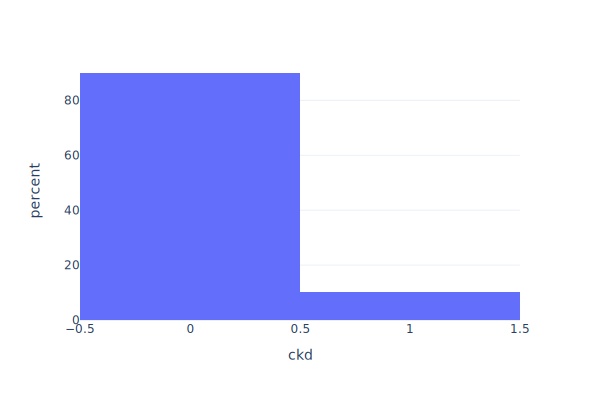

Column alcohol
0.0% missing values


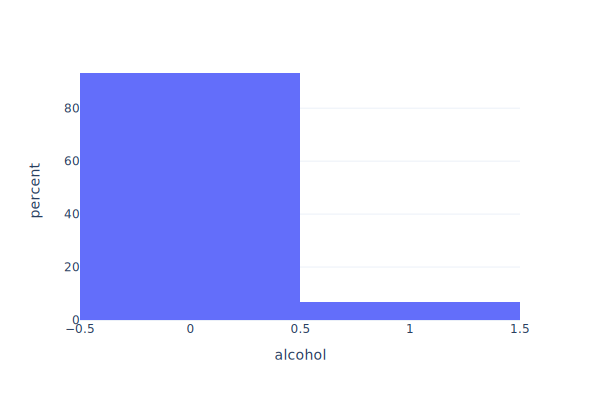

Column htn
0.0% missing values


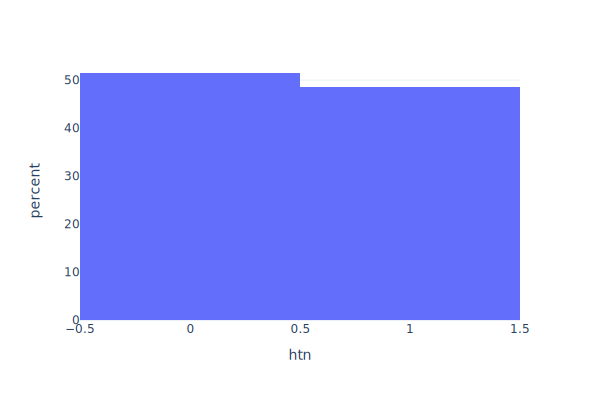

Column prior_cmp
0.0% missing values


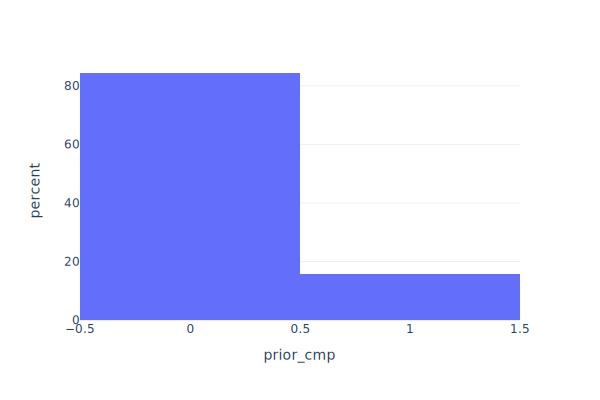

Column congenital
0.0% missing values


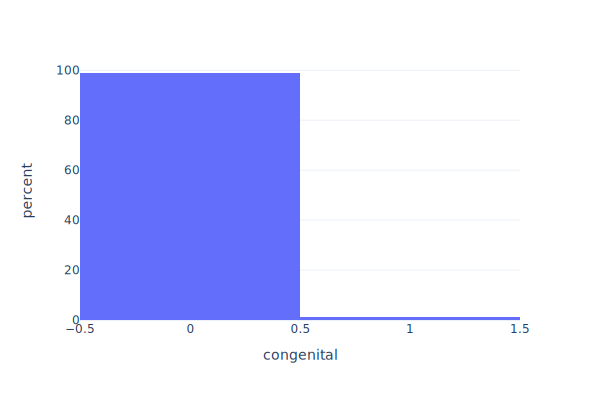

Column atypical_chest_pain
0.0% missing values


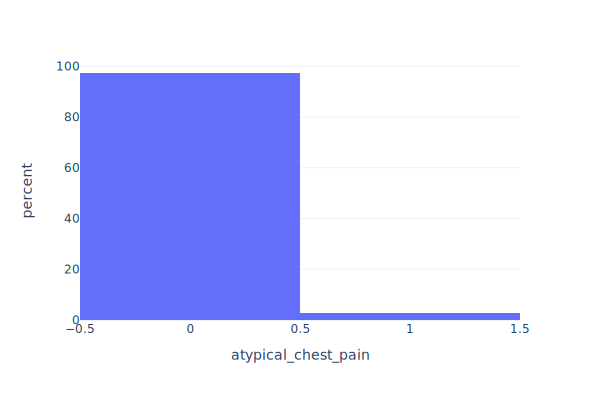

Column censored
0.0% missing values


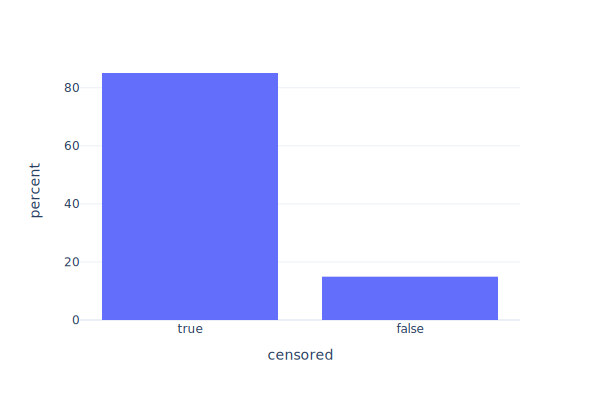

Column rural
0.0% missing values


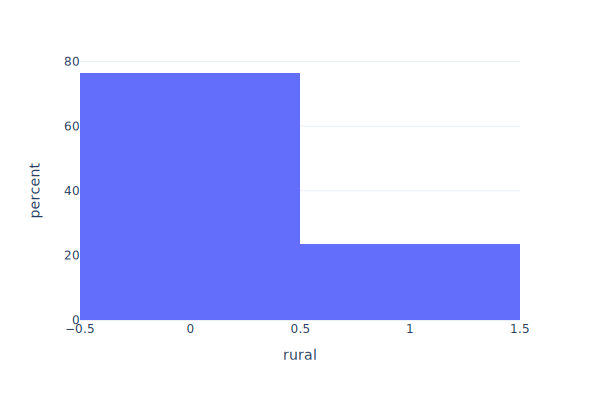

Column urea
1.61% missing values


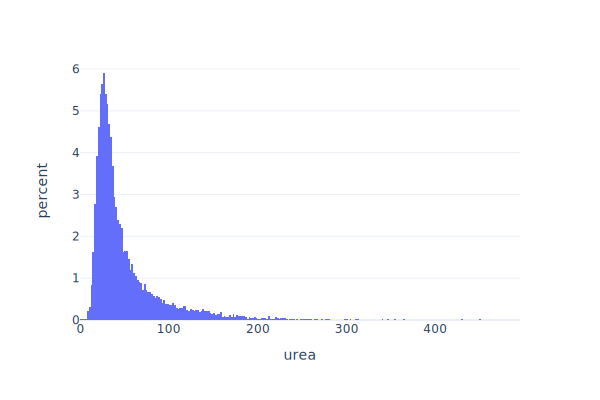

Column stable_angina
0.0% missing values


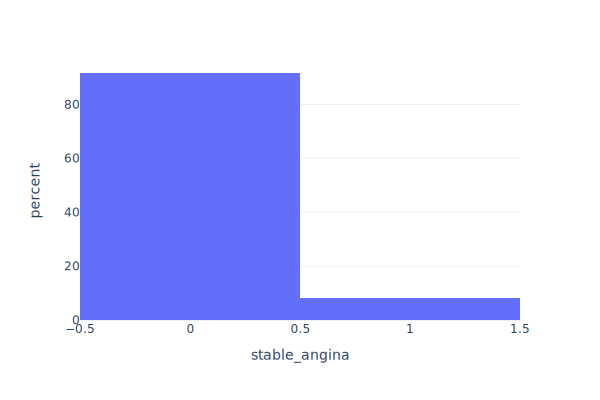

Column chest_infection
0.01% missing values


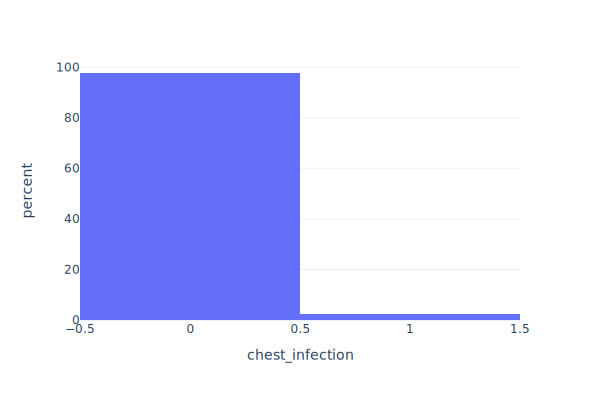

Column glucose
6.11% missing values


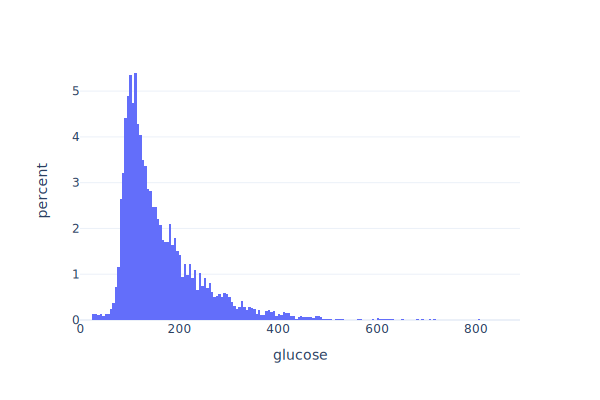

Column dvt
0.0% missing values


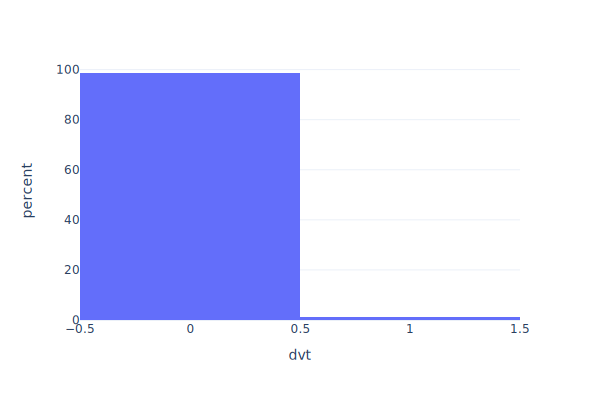

Column first_visit
0.0% missing values


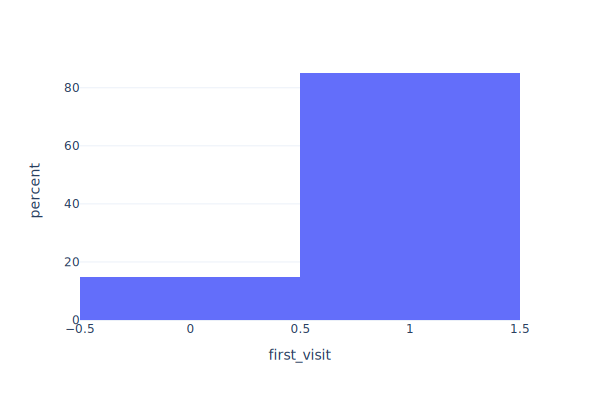

Column cad
0.0% missing values


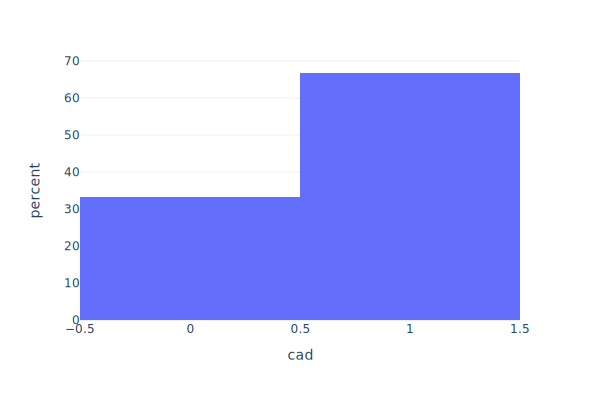

Column raised_cardiac_enzymes
0.0% missing values


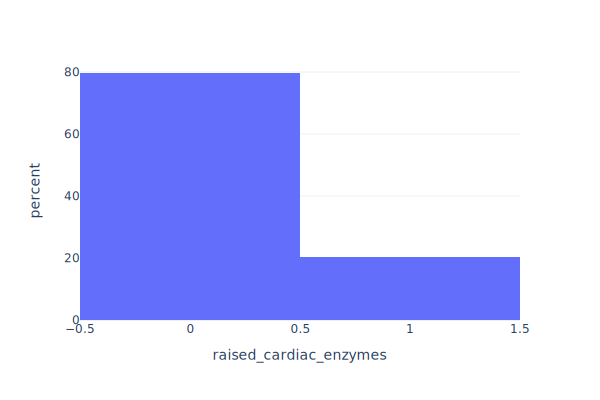

Column age
0.0% missing values


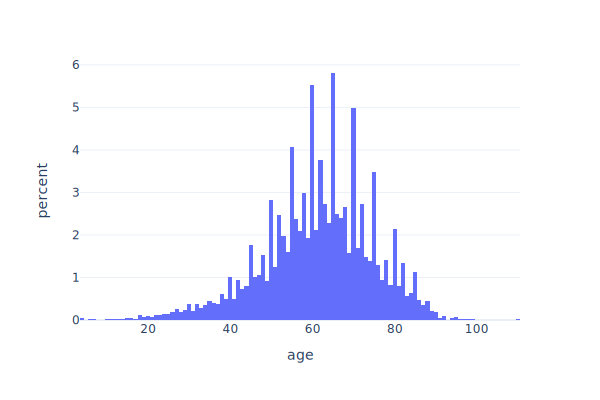

Column age_bin
0.0% missing values


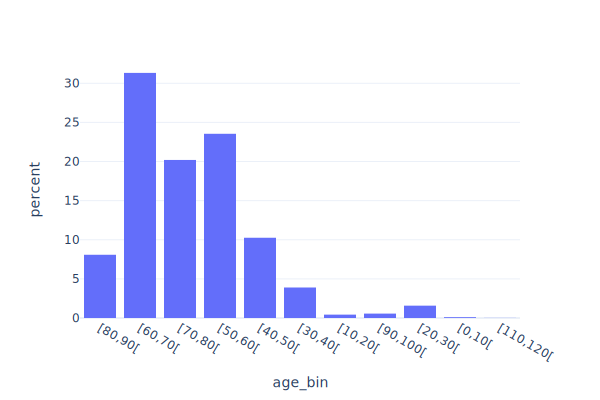

Column sss
0.0% missing values


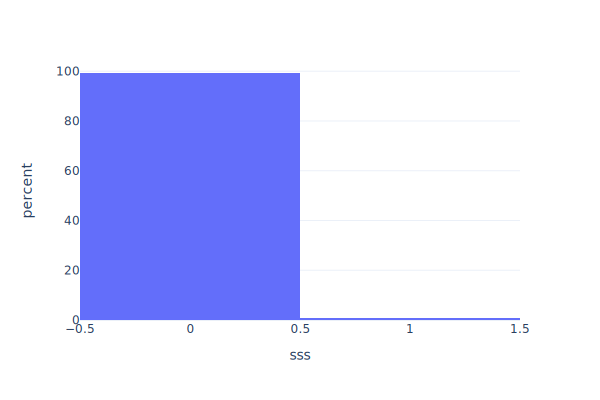

Column creatinine
1.65% missing values


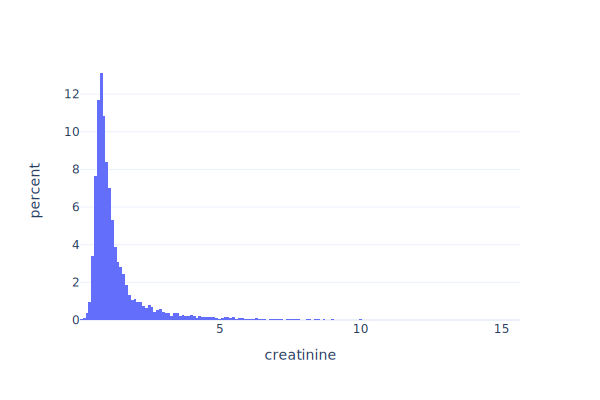

Column smoking
0.0% missing values


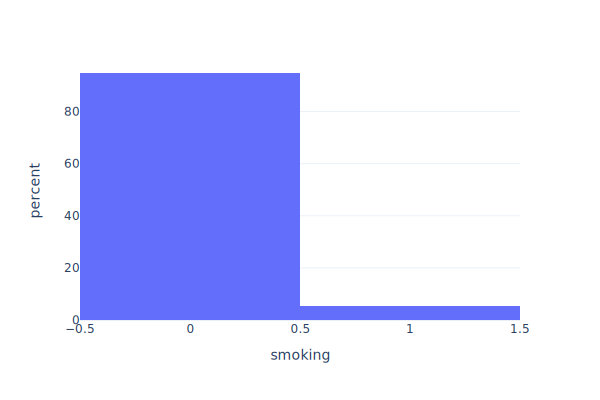

Column bnp
58.32% missing values


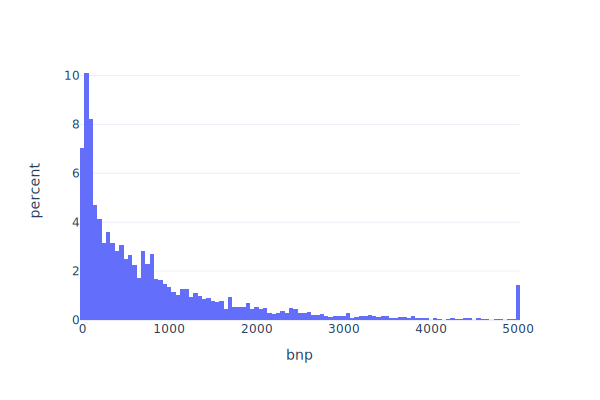

Column acs
0.0% missing values


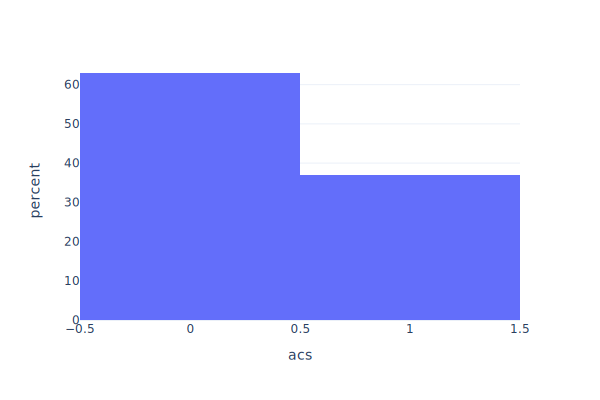

Column cva_bleed
0.0% missing values


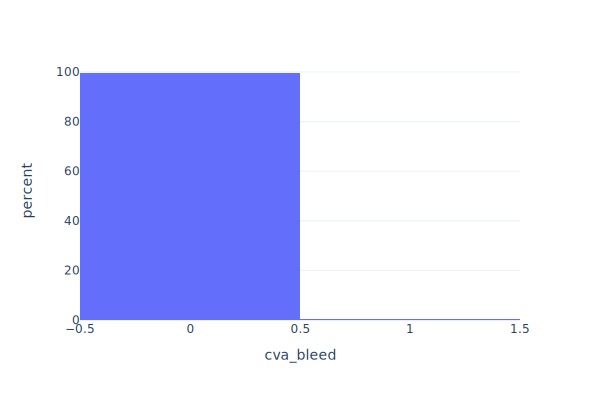

Column stemi
0.0% missing values


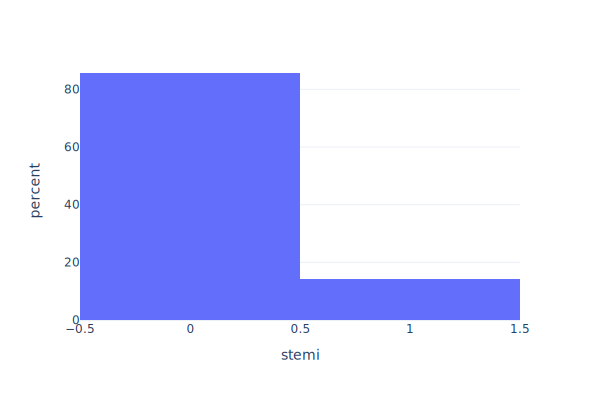

Column severe_anaemia
0.0% missing values


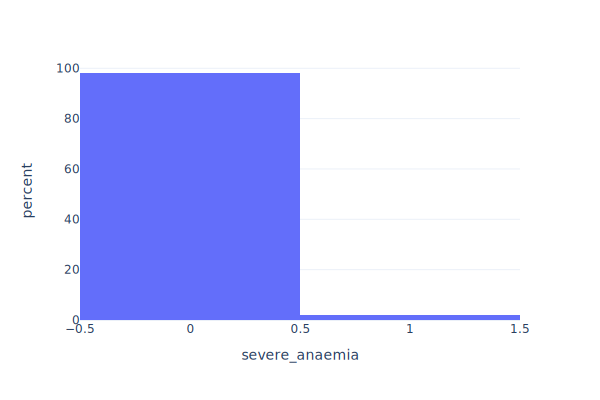

Column anaemia
0.0% missing values


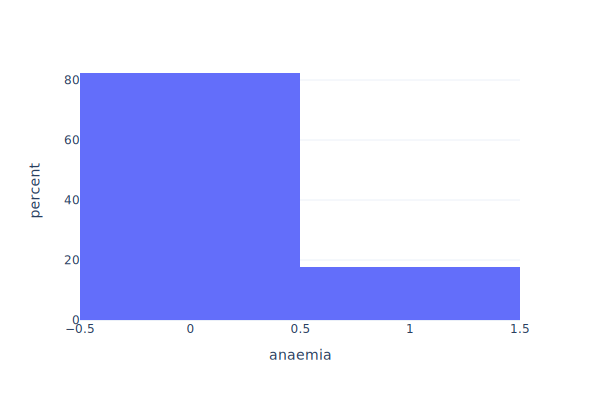

Column aki
0.0% missing values


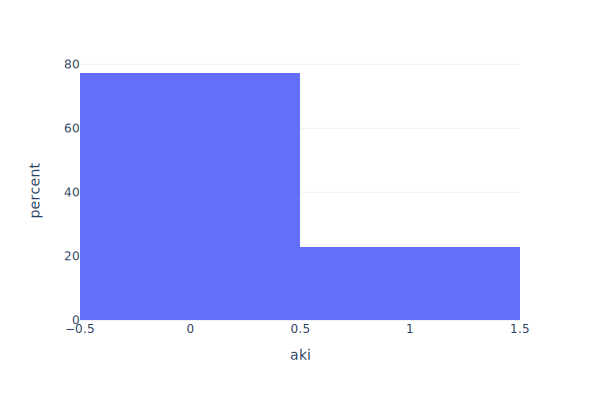

Column duration_of_intensive_unit_stay
0.0% missing values


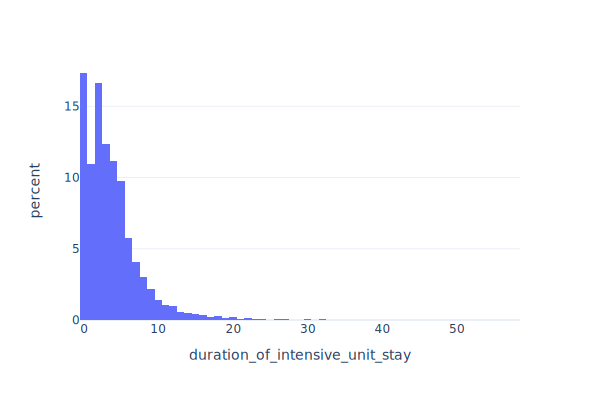

Column psvt
0.0% missing values


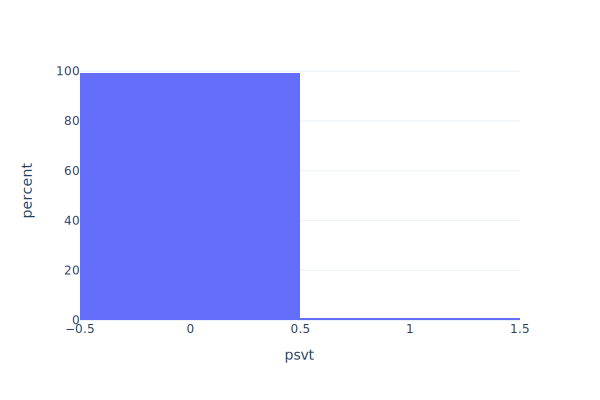

Column gender
0.0% missing values


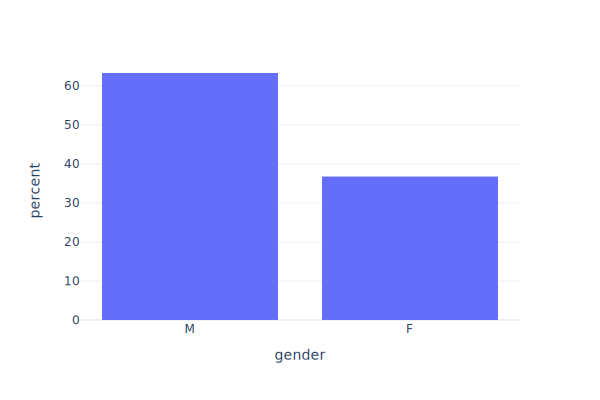

Column cardiogenic_shock
0.0% missing values


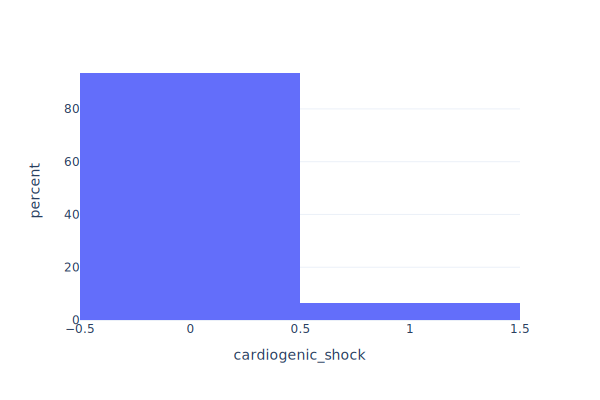

Column ef
10.13% missing values


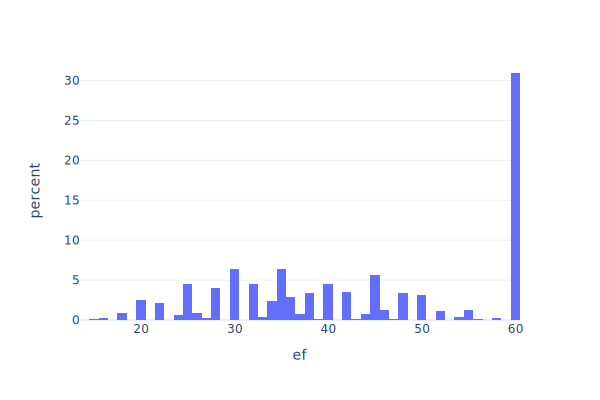

Column valvular
0.0% missing values


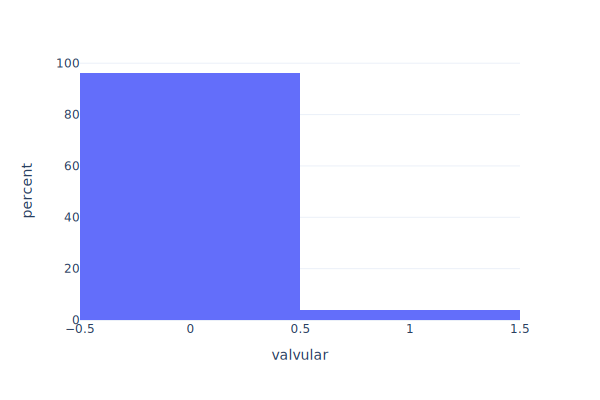

Column gender=F
0.0% missing values


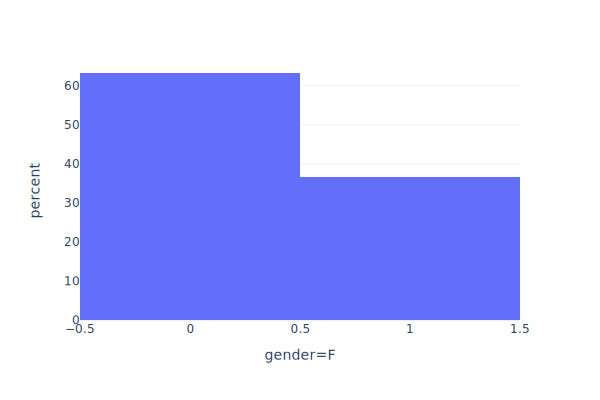

Column hb
1.69% missing values


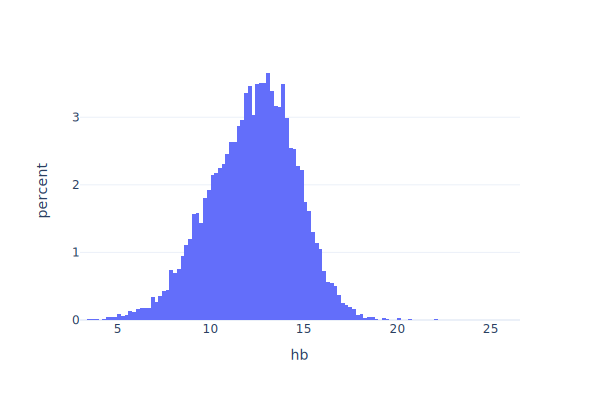

Column cva_infract
0.0% missing values


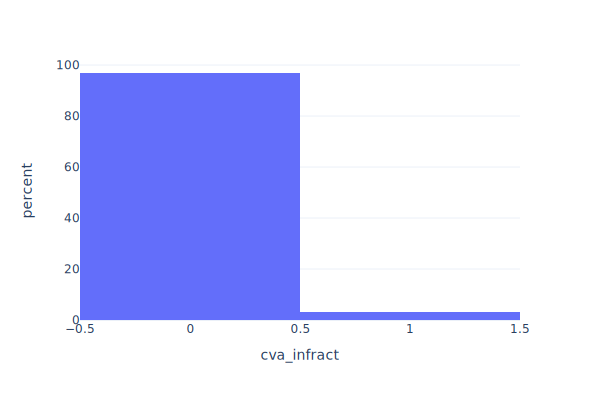

Column tlc
1.9% missing values


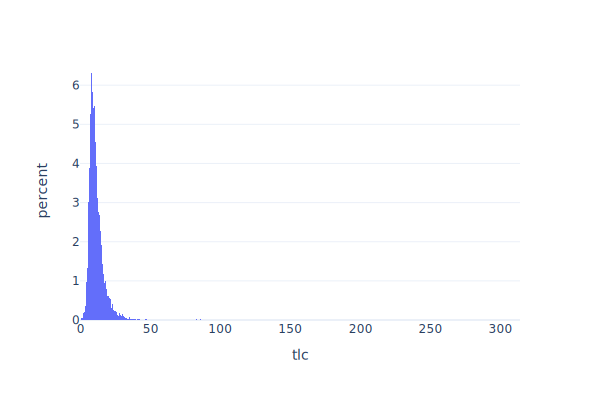

Column platelets
1.94% missing values


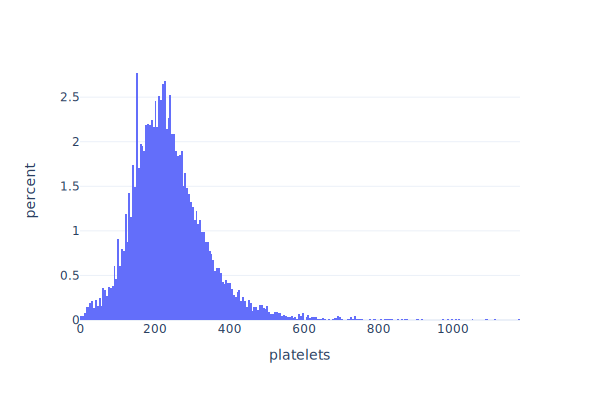

Column dod
0.0% missing values


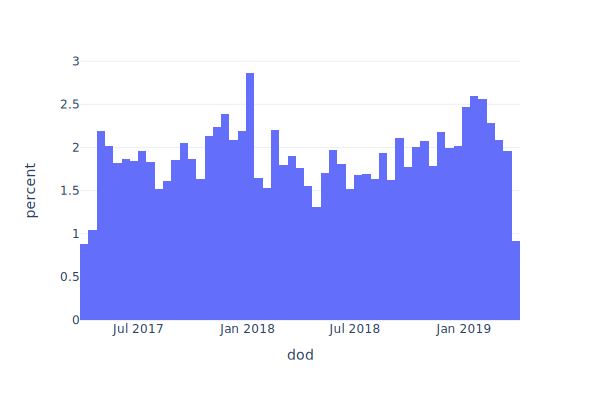

Column vt
0.0% missing values


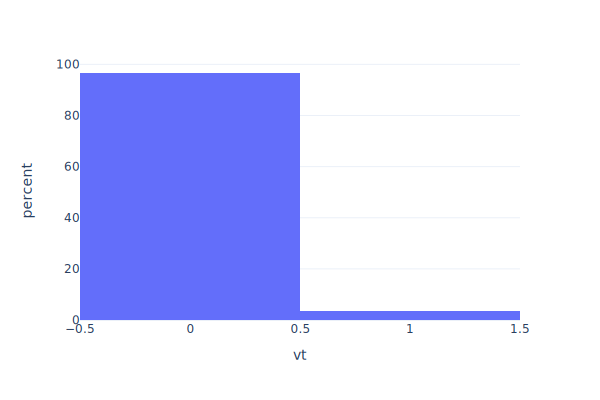

Column neuro_cardiogenic_syncope
0.0% missing values


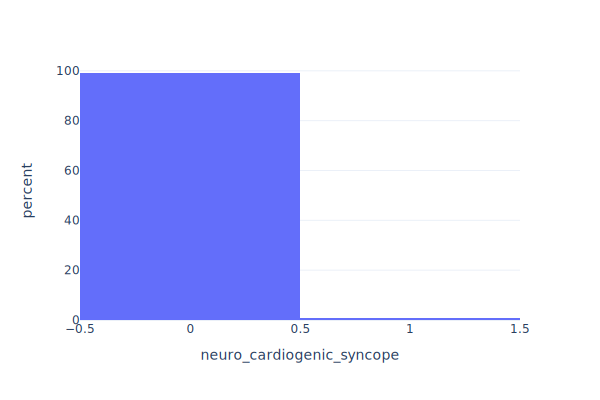

Column time_before_readm
0.0% missing values


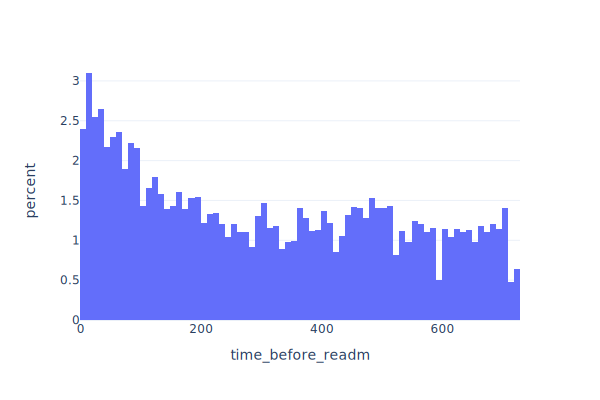

Column heart_failure
0.0% missing values


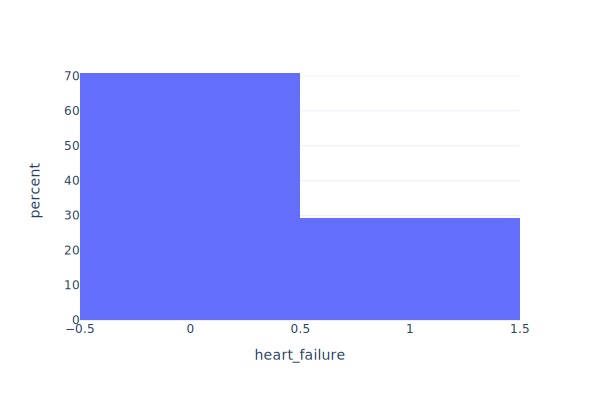

Column hfnef
0.0% missing values


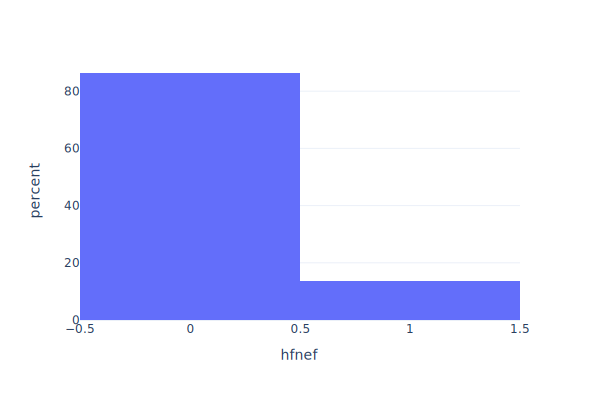

Column mrd
0.0% missing values


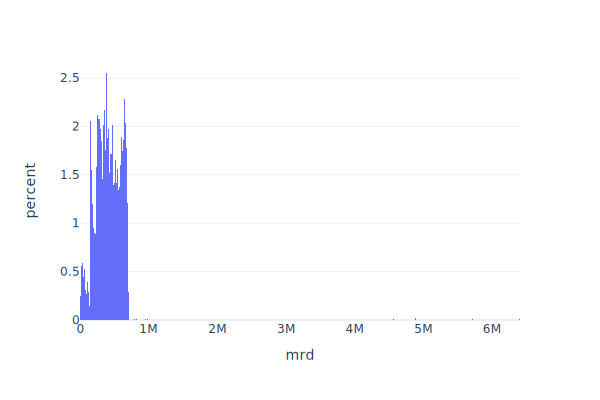

Column nb_visits
0.0% missing values


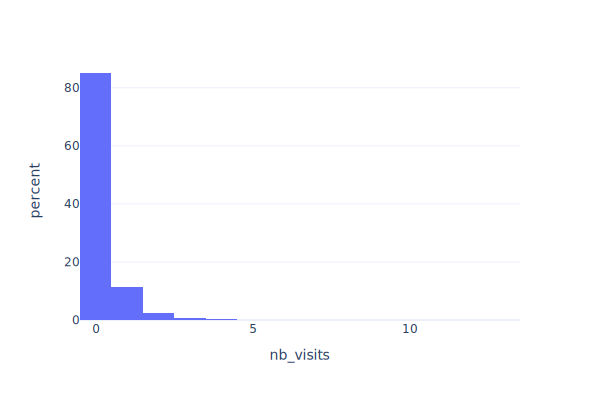

Column chb
0.0% missing values


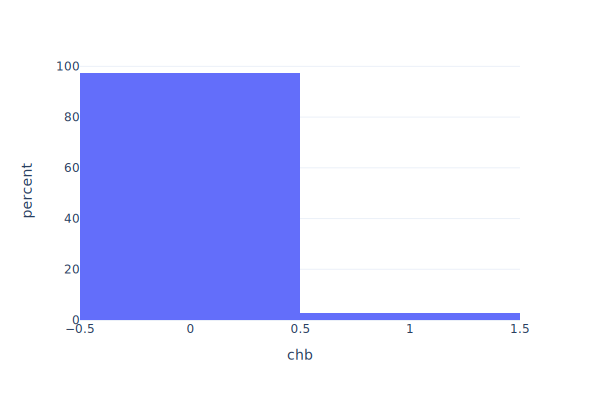

Column hfref
0.0% missing values


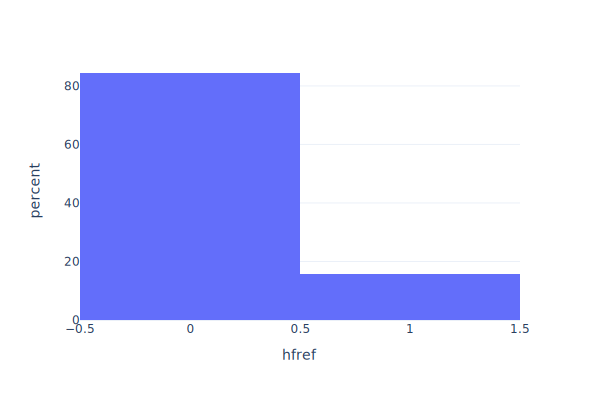

Column af
0.0% missing values


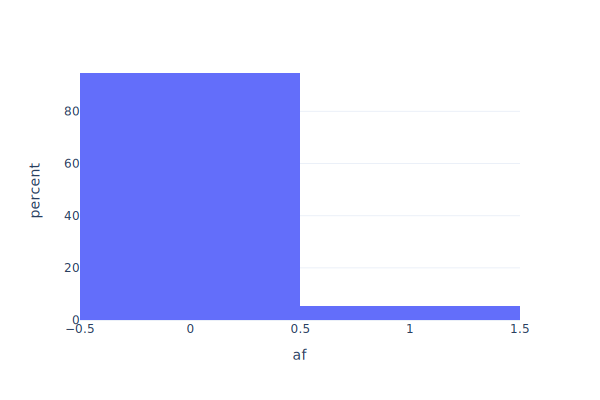

Column uti
0.0% missing values


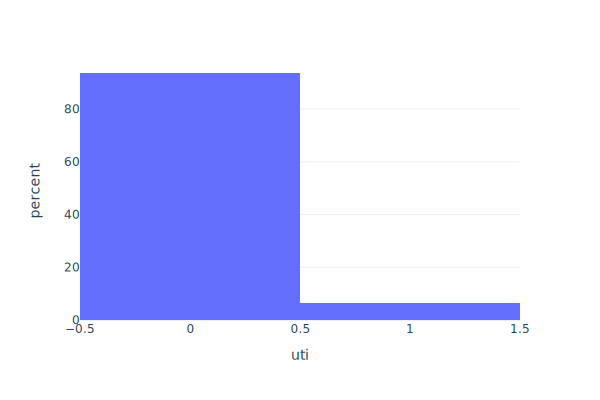

Column pulmonary_embolism
0.0% missing values


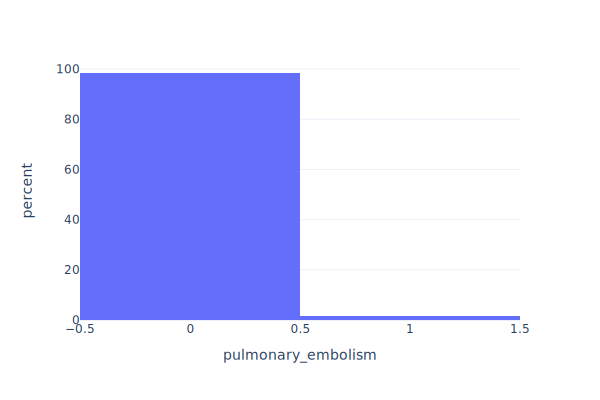

In [13]:
for c in cols:
    print('Column {}'.format(c))
    print('{}% missing values'.format(round(df[c].isna().mean()*100, 2)))
    px.histogram(
        df, x=c, histnorm = "percent", 
        width = 600, height = 400
    ).show()

# 5. Correlation

In [14]:
cols = [
    'age', 
    'duration_of_stay', 'duration_of_intensive_unit_stay', 'smoking',
    'alcohol', 'dm', 'htn', 'cad', 'prior_cmp', 'ckd', 'hb', 'tlc',
    'platelets', 'glucose', 'urea', 'creatinine', 'bnp',
    'raised_cardiac_enzymes', 'ef', 'severe_anaemia', 'anaemia',
    'stable_angina', 'acs', 'stemi', 'atypical_chest_pain', 'heart_failure',
    'hfref', 'hfnef', 'valvular', 'chb', 'sss', 'aki', 'cva_infract',
    'cva_bleed', 'af', 'vt', 'psvt', 'congenital', 'uti',
    'neuro_cardiogenic_syncope', 'orthostatic', 'infective_endocarditis',
    'dvt', 'cardiogenic_shock', 'shock', 'pulmonary_embolism',
    'chest_infection', 'gender=F',
    'type_adm=E', 
    'time_before_readm', 'first_visit',
    'nb_visits', 'duration_of_stay_lag1',
    'duration_of_intensive_unit_stay_lag1', 'cardiogenic_shock_lag1',
    'cad_lag1', 'time_before_readm_lag1'
]

In [15]:
df[cols].corr()['time_before_readm'].sort_values(ascending =False)

time_before_readm                       1.000000
first_visit                             0.160962
dm                                      0.125181
hb                                      0.086347
cardiogenic_shock                       0.084292
alcohol                                 0.083111
smoking                                 0.066610
bnp                                     0.052769
cva_infract                             0.051008
shock                                   0.049621
uti                                     0.047801
af                                      0.046207
stemi                                   0.045481
tlc                                     0.033560
hfref                                   0.027463
orthostatic                             0.026914
prior_cmp                               0.024548
congenital                              0.024424
neuro_cardiogenic_syncope               0.021052
pulmonary_embolism                      0.020158
stable_angina       

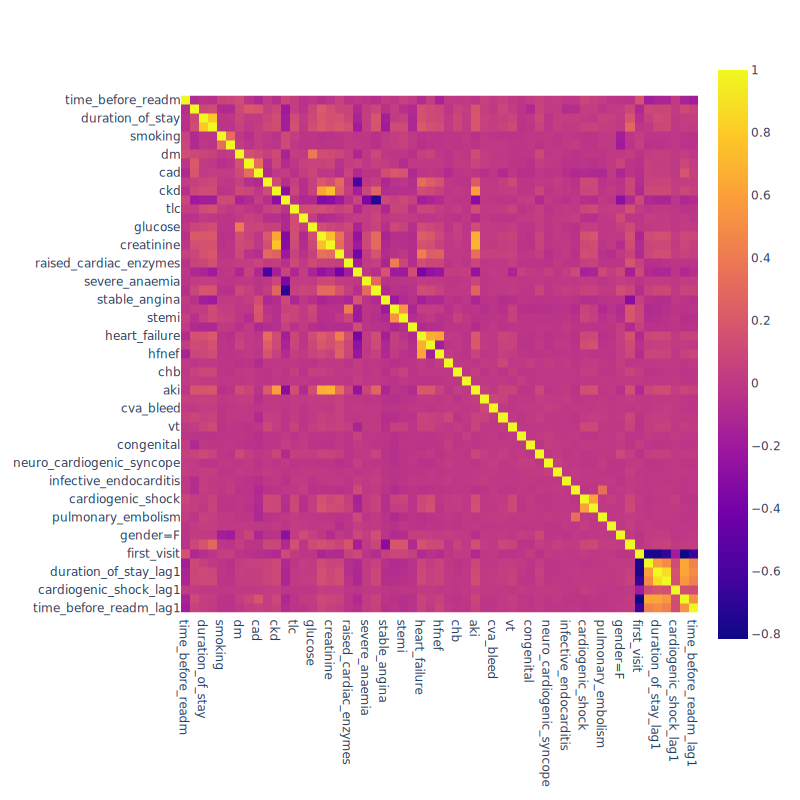

In [16]:
px.imshow(
    df[['time_before_readm'] + [c for c in cols if c!='time_before_readm']].corr(), 
    width=800, height=800).show()